# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)          

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
        # Run an API request for each of the cities
    try: 
        params = {"q":city, "units":"metric", "appid":weather_api_key}

        # Log the url, record, and set numbers
        print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
        
        # Add 1 to the record count
        record_count += 1

        # Parse the JSON and retrieve data
        api_response = requests.get(url, params)
            
        city_weather = api_response.json()        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"] 
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | nabire
Processing Record 3 of Set 1 | shingu
Processing Record 4 of Set 1 | khandud
Processing Record 5 of Set 1 | yangor
City not found. Skipping...
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | vilyuchinsk
Processing Record 11 of Set 1 | vila franca do campo
Processing Record 12 of Set 1 | gbarnga
Processing Record 13 of Set 1 | melekeok village
Processing Record 14 of Set 1 | shimoda
Processing Record 15 of Set 1 | itaituba
Processing Record 16 of Set 1 | yanykurgan
Processing Record 17 of Set 1 | greymouth
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | alofi
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | jamestown
Processing Record 22

Processing Record 37 of Set 4 | canto do buriti
Processing Record 38 of Set 4 | ulan bator
Processing Record 39 of Set 4 | bandarbeyla
Processing Record 40 of Set 4 | fort abbas
Processing Record 41 of Set 4 | kenai
Processing Record 42 of Set 4 | namibe
Processing Record 43 of Set 4 | garissa
Processing Record 44 of Set 4 | red oak
Processing Record 45 of Set 4 | fallon
Processing Record 46 of Set 4 | wenling
Processing Record 47 of Set 4 | tiksi
Processing Record 48 of Set 4 | morden
Processing Record 49 of Set 4 | tyrnyauz
Processing Record 0 of Set 5 | harnosand
Processing Record 1 of Set 5 | lebu
Processing Record 2 of Set 5 | myshkin
Processing Record 3 of Set 5 | ylitornio
Processing Record 4 of Set 5 | nemuro
Processing Record 5 of Set 5 | avarua
Processing Record 6 of Set 5 | fort mcmurray
Processing Record 7 of Set 5 | hayma'
City not found. Skipping...
Processing Record 8 of Set 5 | uturoa
Processing Record 9 of Set 5 | anadyr
Processing Record 10 of Set 5 | san jose village

Processing Record 29 of Set 8 | taroa
Processing Record 30 of Set 8 | east ballina
Processing Record 31 of Set 8 | santiago de cao
Processing Record 32 of Set 8 | novo aripuana
Processing Record 33 of Set 8 | bijar
Processing Record 34 of Set 8 | ambohitrandriamanitra
City not found. Skipping...
Processing Record 35 of Set 8 | mejit
Processing Record 36 of Set 8 | gali
Processing Record 37 of Set 8 | noumea
Processing Record 38 of Set 8 | mossel bay
Processing Record 39 of Set 8 | yaren
Processing Record 40 of Set 8 | ouani
Processing Record 41 of Set 8 | bangor
Processing Record 42 of Set 8 | mont-laurier
Processing Record 43 of Set 8 | pontian kechil
Processing Record 44 of Set 8 | saipan
Processing Record 45 of Set 8 | tabuk
Processing Record 46 of Set 8 | ghatanji
Processing Record 47 of Set 8 | kalevala
Processing Record 48 of Set 8 | sisimiut
Processing Record 49 of Set 8 | petauke
Processing Record 0 of Set 9 | tanjung selor
City not found. Skipping...
Processing Record 1 of Set

Processing Record 18 of Set 12 | angel r. cabada
Processing Record 19 of Set 12 | katsuura
Processing Record 20 of Set 12 | vorgashor
Processing Record 21 of Set 12 | maracaibo
Processing Record 22 of Set 12 | matthew town
Processing Record 23 of Set 12 | umba
Processing Record 24 of Set 12 | uchiza
Processing Record 25 of Set 12 | vernon
Processing Record 26 of Set 12 | dongola
Processing Record 27 of Set 12 | manokwari
Processing Record 28 of Set 12 | kyren
Processing Record 29 of Set 12 | wad az zaki
Processing Record 30 of Set 12 | tual
Processing Record 31 of Set 12 | skovorodino
Processing Record 32 of Set 12 | port blair
Processing Record 33 of Set 12 | homer
Processing Record 34 of Set 12 | anloga
Processing Record 35 of Set 12 | kailua-kona
Processing Record 36 of Set 12 | colonia
Processing Record 37 of Set 12 | mbaiki
Processing Record 38 of Set 12 | jabat
Processing Record 39 of Set 12 | schelklingen
Processing Record 40 of Set 12 | nevel'sk
Processing Record 41 of Set 12 |

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns = ['City','Lat','Lng', "Max Temp", "Humidity",
                                                  "Cloudiness", "Wind Speed", "Country", "Date"]) 

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.81,76,78,22.93,TF,1689251271
1,nabire,-3.3667,135.4833,24.89,90,100,0.93,ID,1689251324
2,shingu,33.7333,135.9833,24.75,92,99,2.44,JP,1689251324
3,khandud,36.9513,72.3180,25.01,12,0,1.78,AF,1689251325
4,port elizabeth,-33.9180,25.5701,21.17,68,0,3.09,ZA,1689251326


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.81,76,78,22.93,TF,1689251271
1,nabire,-3.3667,135.4833,24.89,90,100,0.93,ID,1689251324
2,shingu,33.7333,135.9833,24.75,92,99,2.44,JP,1689251324
3,khandud,36.9513,72.3180,25.01,12,0,1.78,AF,1689251325
4,port elizabeth,-33.9180,25.5701,21.17,68,0,3.09,ZA,1689251326


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

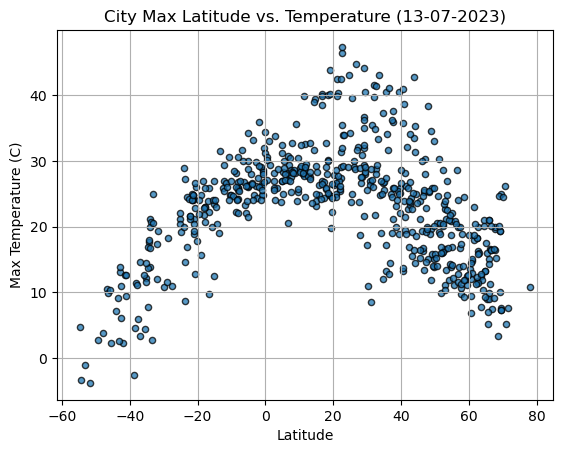

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",s=20,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
date = dt.date.today().strftime("%d-%m-%Y")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

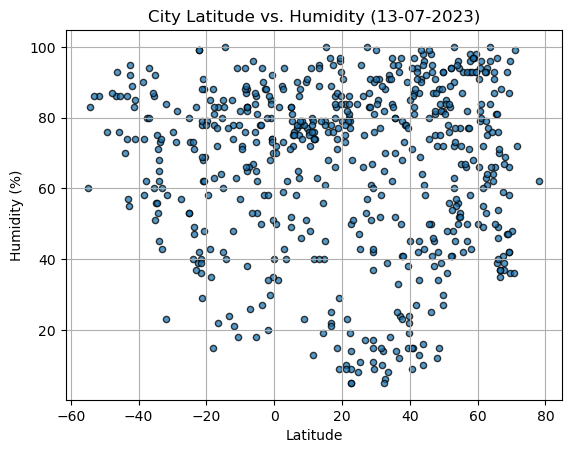

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", s=20,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

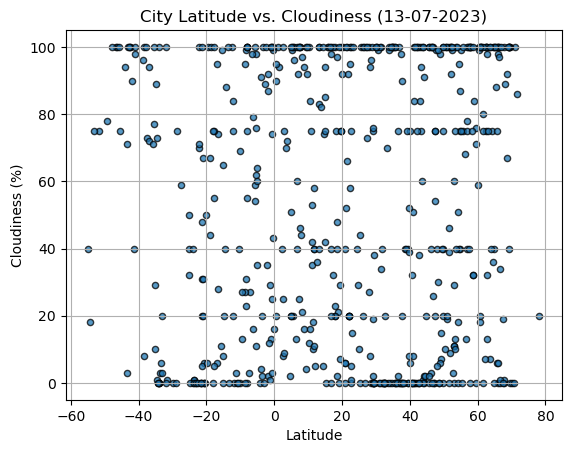

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", s=20,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

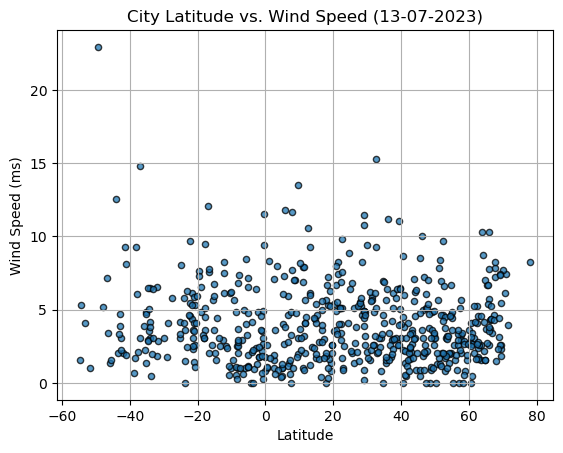

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", s=20,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (ms)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def makeLinRegression(df, x_Col, y_Col):
        (regr_slope, regr_intercept, regr_r_val, _, _) = linregress(df[x_Col], df[y_Col])
        regr_line_x = np.array([a for a in range(int(min(df[x_Col].values)), int(max(df[x_Col].values)+1))])
        regr_line_y = regr_slope * regr_line_x + regr_intercept
    
        df_axes = df.plot(kind="scatter", x=x_Col, y=y_Col)
    
        df_axes.plot(regr_line_x, regr_line_y, 'r')
        return df_axes

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_cities_count = len(northern_hemi_df)

# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,shingu,33.7333,135.9833,24.75,92,99,2.44,JP,1689251324
3,khandud,36.9513,72.3180,25.01,12,0,1.78,AF,1689251325
7,sitka,57.0531,-135.3300,13.94,77,100,0.00,US,1689251291
8,vilyuchinsk,52.9306,158.4028,11.15,90,11,0.79,RU,1689251328
9,vila franca do campo,37.7167,-25.4333,21.23,79,90,6.13,PT,1689251328
...,...,...,...,...,...,...,...,...,...
590,qarazhal,48.0078,70.7903,38.35,12,5,5.40,KZ,1689251680
592,inari,68.9060,27.0288,20.11,47,100,4.40,FI,1689251681
593,shenjiamen,29.9576,122.2980,25.51,91,100,9.40,CN,1689251682


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]
southern_cities_count = len(southern_hemi_df)

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.81,76,78,22.93,TF,1689251271
1,nabire,-3.3667,135.4833,24.89,90,100,0.93,ID,1689251324
4,port elizabeth,-33.9180,25.5701,21.17,68,0,3.09,ZA,1689251326
5,adamstown,-25.0660,-130.1015,21.14,80,32,4.17,PN,1689251272
6,port alfred,-33.5906,26.8910,20.66,73,3,0.45,ZA,1689251327
...,...,...,...,...,...,...,...,...,...
571,mount gambier,-37.8333,140.7667,11.16,62,100,6.10,AU,1689251664
576,kununurra,-15.7667,128.7333,19.99,64,11,2.57,AU,1689251672
582,saint-pierre,-21.3393,55.4781,24.82,69,100,3.09,RE,1689251675


###  Temperature vs. Latitude Linear Regression Plot

Axes(0.125,0.11;0.775x0.77)


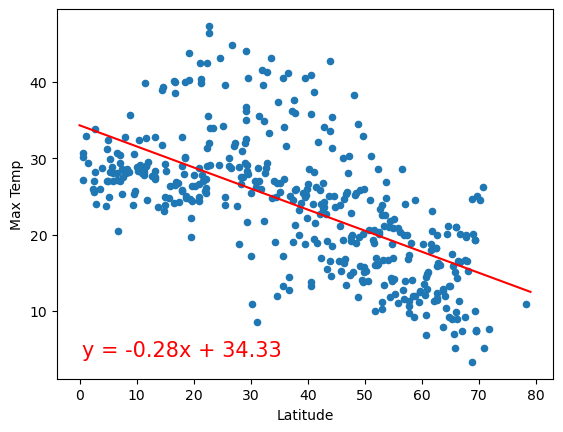

The r-value is: -0.6335460673915443


In [16]:
# Linear regression on Northern Hemisphere
n_temp_slope, n_temp_intercept, n_temp_r_val, _, _ = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Create x and y values for the regression line
regr_line_x = np.array([a for a in range(80)])
regr_line_y = n_temp_slope * regr_line_x + n_temp_intercept

# Scatter plot of Latitude vs. Max Temp
n_temp_axes = northern_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp")
print(n_temp_axes)

# Plot the regression line
n_temp_axes.plot(regr_line_x, regr_line_y, "r")

# Add line equation annotation
line_eq = "y = " + str(round(n_temp_slope,2)) + "x + " + str(round(n_temp_intercept,2))
plt.annotate(line_eq, xy=(0.05, 0.05), xycoords='axes fraction', ha='left', va='bottom', fontsize=15, color="red")

# Set labels for x-axis and y-axis
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Show the plot
plt.show()
print(f"The r-value is: {n_temp_r_val}")

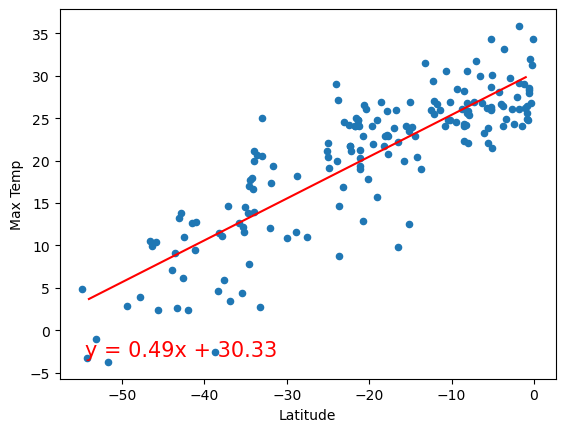

The r-value is: 0.8530587803589158


In [17]:
# Linear regression on Southern Hemisphere
s_temp_slope, s_temp_intercept, s_temp_r_val, _, _ = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
s_temp_lat_axes = makeLinRegression(southern_hemi_df, "Lat", "Max Temp")

# Create x and y values for the regression line
regr_line_x = np.array([a for a in range(80)])
regr_line_y = s_temp_slope * regr_line_x + s_temp_intercept

# Add line equation annotation
line_eq = "y = " + str(round(s_temp_slope,2)) + "x + " + str(round(s_temp_intercept,2))
plt.annotate(line_eq, xy=(0.05, 0.05), xycoords='axes fraction', ha='left', va='bottom', fontsize=15, color="red")

# Set labels for x-axis and y-axis
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Show the plot
plt.show()
print(f"The r-value is: {s_temp_r_val}")

The Max Temperature vs. Latitude plot for cities in the northern hemisphere is shown above for the max temperature appears to show a strong negative linear relationship with Latitude, however in the southern hemisphere the max temperature appears to show a strong positive linear relationship with Latitude.

### Humidity vs. Latitude Linear Regression Plot

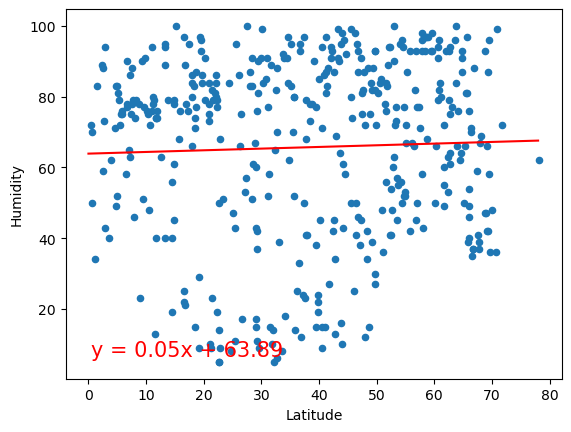

The r-value is: 0.036502380407045926


In [18]:
# Northern Hemisphere
n_hum_slope, n_hum_intercept, n_hum_r_val, _, _ = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
n_hum_lat_axes = makeLinRegression(northern_hemi_df, "Lat", "Humidity")

# Create x and y values for the regression line
regr_line_x = np.array([a for a in range(80)])
regr_line_y = n_hum_slope * regr_line_x + n_hum_intercept

# Add line equation annotation
line_eq = "y = " + str(round(n_hum_slope,2)) + "x + " + str(round(n_hum_intercept,2))
plt.annotate(line_eq, xy=(0.05, 0.05), xycoords='axes fraction', ha='left', va='bottom', fontsize=15, color="red")

# Set labels for x-axis and y-axis
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Show the plot
plt.show()
print(f"The r-value is: {n_hum_r_val}")

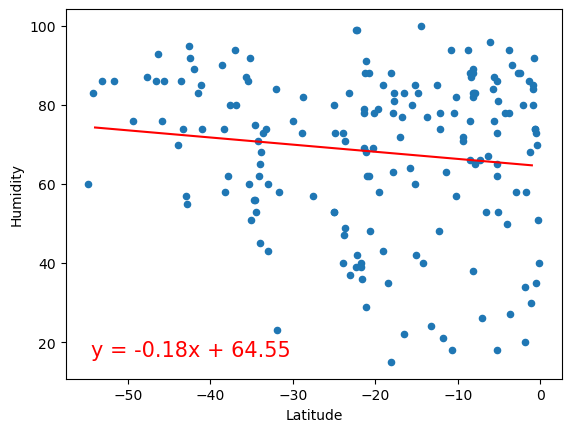

The r-value is: -0.1294754440698791


In [19]:
# Southern Hemisphere
s_hum_slope, s_hum_intercept, s_hum_r_val, _, _ = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
n_hum_lat_axes = makeLinRegression(southern_hemi_df, "Lat", "Humidity")

# Create x and y values for the regression line
regr_line_x = np.array([a for a in range(80)])
regr_line_y = s_hum_slope * regr_line_x + s_hum_intercept

# Add line equation annotation
line_eq = "y = " + str(round(s_hum_slope,2)) + "x + " + str(round(s_hum_intercept,2))
plt.annotate(line_eq, xy=(0.05, 0.05), xycoords='axes fraction', ha='left', va='bottom', fontsize=15, color="red")

# Set labels for x-axis and y-axis
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Show the plot
plt.show()
print(f"The r-value is: {s_hum_r_val}")

The Humidity vs. Latitude plot for cities in the northern & southern hemisphere shown above. The data seems to show no relationship between the humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

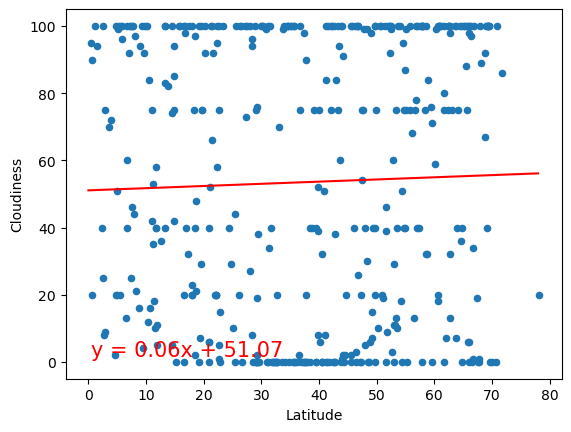

The r-value is: 0.03128680036892596


In [20]:
# Northern Hemisphere
n_cloud_slope, n_cloud_intercept, n_cloud_r_val, _, _ = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
n_cloud_lat_axes = makeLinRegression(northern_hemi_df, "Lat", "Cloudiness")

# Create x and y values for the regression line
regr_line_x = np.array([a for a in range(80)])
regr_line_y = n_cloud_slope * regr_line_x + n_cloud_intercept

# Add line equation annotation
line_eq = "y = " + str(round(n_cloud_slope,2)) + "x + " + str(round(n_cloud_intercept,2))
plt.annotate(line_eq, xy=(0.05, 0.05), xycoords='axes fraction', ha='left', va='bottom', fontsize=15, color="red")

# Set labels for x-axis and y-axis
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Show the plot
plt.show()
print(f"The r-value is: {n_cloud_r_val}")

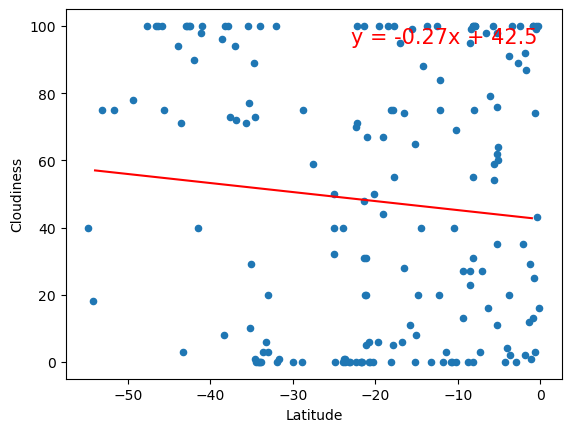

The r-value is: -0.09718654540711699


In [21]:
# Southern Hemisphere
s_cloud_slope, s_cloud_intercept, s_cloud_r_val, _, _ = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
s_cloud_lat_axes = makeLinRegression(southern_hemi_df, "Lat", "Cloudiness")

# Create x and y values for the regression line
regr_line_x = np.array([a for a in range(80)])
regr_line_y = s_cloud_slope * regr_line_x + s_cloud_intercept

# Add line equation annotation
line_eq = "y = " + str(round(s_cloud_slope,2)) + "x + " + str(round(s_cloud_intercept,2))
plt.annotate(line_eq, xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top', fontsize=15, color="red")

# Set labels for x-axis and y-axis
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Show the plot
plt.show()
print(f"The r-value is: {s_cloud_r_val}")

The Cloudiness vs. Latitude plot for cities in the northern and southern hemisphere shown above. The data seems to show no relationship between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

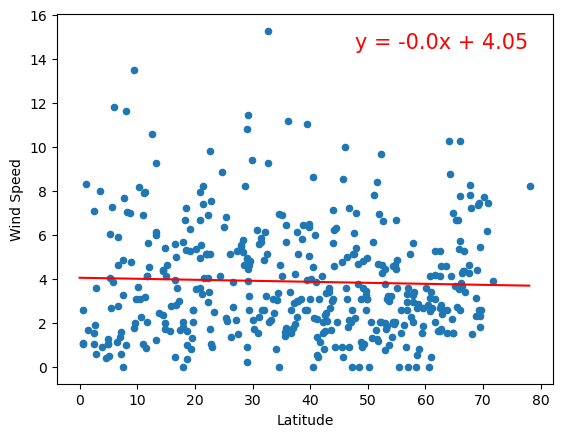

The r-value is: -0.03563165932138433


In [22]:
# Northern Hemisphere
n_cloud_slope, n_cloud_intercept, n_cloud_r_val, _, _ = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
n_cloud_lat_axes = makeLinRegression(northern_hemi_df, "Lat", "Wind Speed")

# Create x and y values for the regression line
regr_line_x = np.array([a for a in range(80)])
regr_line_y = n_cloud_slope * regr_line_x + n_cloud_intercept

# Add line equation annotation
line_eq = "y = " + str(round(n_cloud_slope,2)) + "x + " + str(round(n_cloud_intercept,2))
plt.annotate(line_eq, xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top', fontsize=15, color="red")

# Set labels for x-axis and y-axis
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Show the plot
plt.show()
print(f"The r-value is: {n_cloud_r_val}")

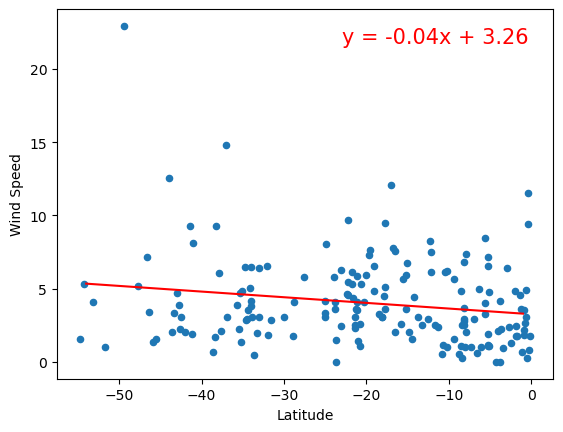

The r-value is: -0.18647054410966216


In [23]:
# Southern Hemisphere
s_cloud_slope, s_cloud_intercept, s_cloud_r_val, _, _ = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
s_cloud_lat_axes = makeLinRegression(southern_hemi_df, "Lat", "Wind Speed")

# Create x and y values for the regression line
regr_line_x = np.array([a for a in range(80)])
regr_line_y = s_cloud_slope * regr_line_x + s_cloud_intercept

# Add line equation annotation
line_eq = "y = " + str(round(s_cloud_slope,2)) + "x + " + str(round(s_cloud_intercept,2))
plt.annotate(line_eq, xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top', fontsize=15, color="red")

# Set labels for x-axis and y-axis
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Show the plot
plt.show()
print(f"The r-value is: {s_cloud_r_val}")

The Wind Speed vs. Latitude plot for cities in the northen and southern hemisphere shown above. The data seems to show no relationship between wind speed and latitude.